# Network Science - UDD

## Network projections


#### Cristian Candia-Castro Vallejos, Ph.D.$^{1,2}$

#### Yessica Herrera-Guzmán, Ph.D.$^{2, 3}$

- [1] Data Science Institute (IDS), Universidad del Desarrollo,Chile
- [2] Northwestern Institute on Complex Systems, Kellogg School of Management, Northwestern Unviersity, USA
- [3] Center for Complex Network Research (CCNR), Northwestern Unviersity, USA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import networkx as nx

**Number of people who contracted COVID**

This is a randomly generated dataset to illustrate the construction of bipartite networks from empirical tabular datasets. 

In this dataset, there are COVID variants and the names listed for each variant are those who were infected witht that variant. 

The goal of this practice is that you become familiar with this type of structured data that is not in the form of an edgelist, but that resembles sources of data from empirical research. From this data, you should be able to create a bipartite network, as well as the nodelist and edgelist for each of the network projections. 

In [3]:
data = pd.read_csv('COVIDvariants.csv')

Convert the dataset to the edgelist of a bipartite network, where one level (col1 = 'variant') are the variants and another level (col2 = 'name') are the infected individuals.

In [4]:
df = data.melt(var_name='variant', value_name='name').dropna()

In [5]:
df

,variant,name
0,Variant1,Charlie
1,Variant1,Sam
2,Variant1,Nina
3,Variant1,Alice
4,Variant1,Kevin
...,...,...
395,Variant10,Sarah
396,Variant10,Paula
397,Variant10,Ted
398,Variant10,Arthur


In [6]:
g = nx.Graph()

In [7]:
g = nx.from_pandas_edgelist(df, source='variant', target='name')

In [8]:
print(nx.info(g))

Graph with 69 nodes and 221 edges


In [10]:
g.degree('Ivy')

4

In [11]:
variants = list(df.variant.unique())

In [12]:
people = list(df.name.unique())

In [13]:
layout = nx.spring_layout(g, k=0.05, iterations=50)

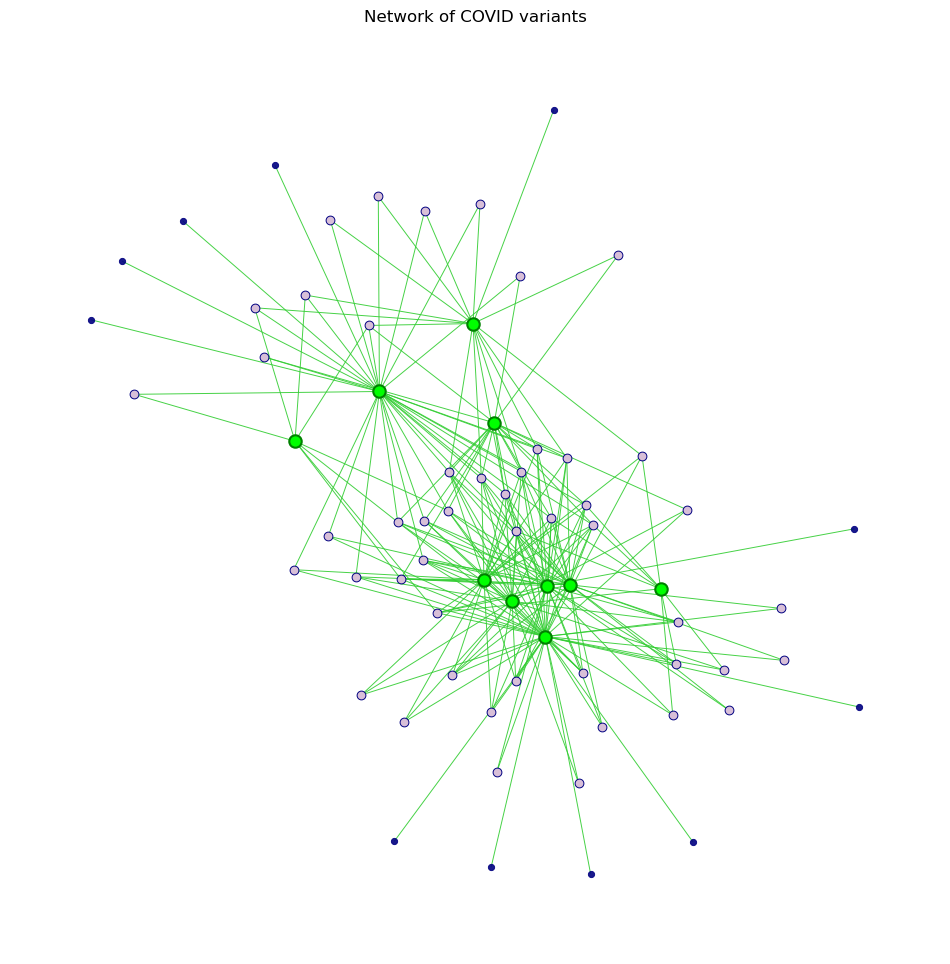

In [14]:
plt.figure(figsize=(12, 12))

# Draw VARIANTS
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=variants, 
                       node_size=80, # a LIST of sizes, based on g.degree
                       node_color='lime',
                       edgecolors='green', 
                       linewidths=1.5)


# Draw EVERYONE
nx.draw_networkx_nodes(g, layout, nodelist=people, 
                       node_color='navy', 
                       edgecolors='navy',
                       alpha=0.9,
                       linewidths=0.7, 
                       node_size=20)


# Draw REINFECTED PEOPLE
reinfected_people = [person for person in people if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=reinfected_people, 
                       node_color='thistle', 
                       edgecolors='navy',
                       linewidths=0.7,
                       node_size=40)

nx.draw_networkx_edges(g, layout, width=0.7, alpha=0.9,
                       edge_color="limegreen")

# # label people
# node_labels = dict(zip(people, people))
# nx.draw_networkx_labels(g, layout, labels=node_labels,
#                        font_size=8, font_weight='400')


# # label variants
# node_variants = dict(zip(variants, variants))
# nx.draw_networkx_labels(g, layout, labels=node_variants,
#                        font_size=12, font_weight='400')



# Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Network of COVID variants")
# plt.savefig('network_name.pdf', bbox_inches='tight', pad_inches=0)
# Tell matplotlib to show it
plt.show()

# Homework

* Question 1: What is the nature of the relationship between the two sets of nodes in the bipartite network?

* Question 2: Are there any specific measures for node centrality and influence in bipartite networks?

* Question 2: What are the projected networks of each node set? (i.e., separate networks for each set)

* Exercise: Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively. See sample below. Then, explain the relevance of each projection. 

**Project to unipartite: Infected people**

In [15]:
wide_df = df.pivot_table(index='variant', columns=df.groupby('variant').cumcount(), values='name', aggfunc='first')

In [16]:
wide_df.columns = [f'Name{i+1}' for i in range(wide_df.shape[1])]

In [17]:
# Initialize empty lists to store source and target names
source = []
target = []

# Iterate through DataFrame rows
for index, row in wide_df.iterrows():
    # Iterate through column names in the current row
    for i, name1 in enumerate(row):
        for j, name2 in enumerate(row[i+1:]):
            # Append source and target names to the lists
            source.append(name1)
            target.append(name2)

# Create a new DataFrame from the source and target lists
people_df = pd.DataFrame({'Source': source, 'Target': target})

In [18]:
people_df = people_df.dropna()

In [19]:
new_df = people_df.drop_duplicates()

In [20]:
new_df = new_df[new_df['Source'] != new_df['Target']]

In [21]:
h = nx.from_pandas_edgelist(new_df, source='Source', target='Target')

In [22]:
print(nx.info(h))

Graph with 59 nodes and 1265 edges


In [23]:
layout_h = nx.spring_layout(h, k=0.1, iterations=50)

In [24]:
labels = {node: h.nodes[node].get('label', f'Node {node}') for node in h.nodes}

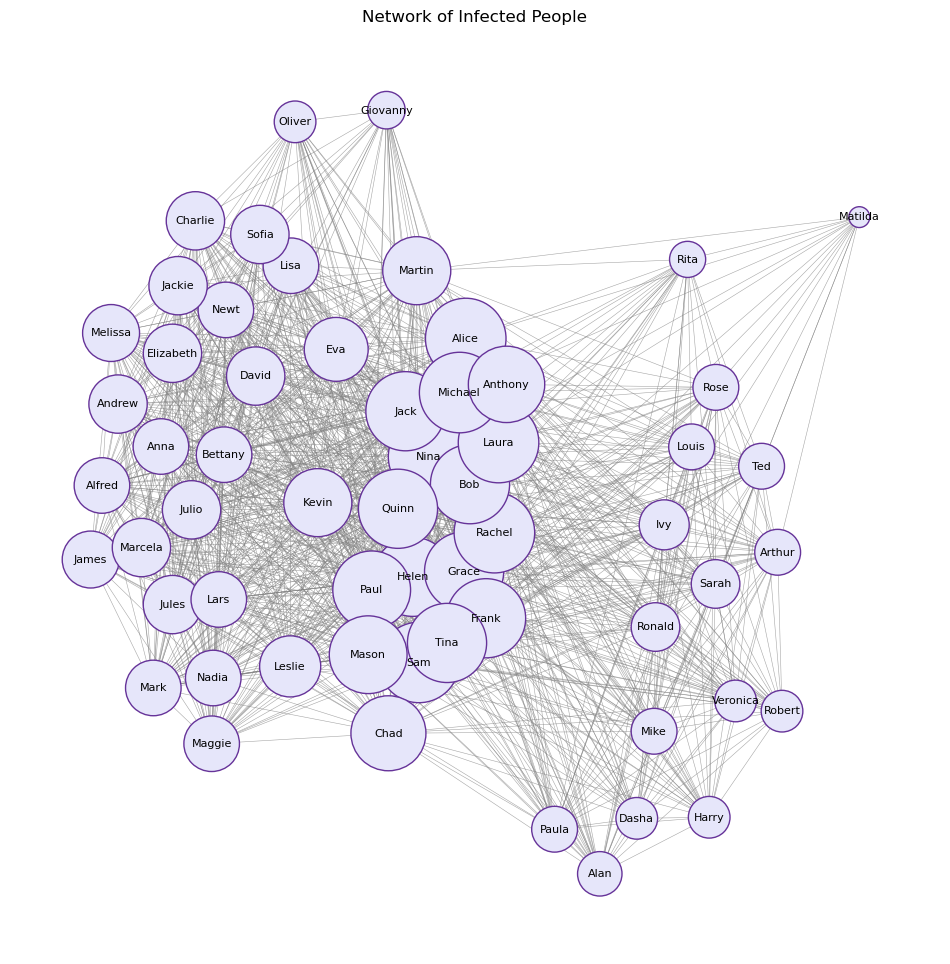

In [25]:
plt.figure(figsize=(12, 12))

nx.draw_networkx_nodes(h, 
                       layout_h, 
                       node_size=[(h.degree(v)) ** 2 for v in h.nodes()], # sizes based on h.degree
                       node_color='lavender',
                       edgecolors='rebeccapurple',
                       linewidths=1)


nx.draw_networkx_edges(h, layout_h, width=0.4, alpha=0.7, edge_color="gray")


node_labels = dict(zip(labels, labels))
nx.draw_networkx_labels(h, layout_h, labels=node_labels,
                       font_size=8)


plt.axis('off')
plt.title("Network of Infected People")
# plt.savefig('network_projection_name.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

# Homework

* Question 1: What are the projected networks of each node set? (i.e., separate networks for each set)

* Question 2: What information can you obtain from each projection?

* Question 3: Explain the usefulness of network projections respect to the network visualization and analysis of the bipartite network. 

* Exercise 1: Calculate the average degree of each network projection, then compute the average degree of the purple nodes and the green nodes in the bipartite network. What are the differences in the distribution? Please explain why.

* Exercise 2: Compute the properties of these projected networks (e.g., size, density, diameter, degree distribution).

* Exercise 3: Visually explore densely connected subgroups or communities within the projections. How do densely connected subgroups in each projection relate to the original bipartite network? 